# Machine Learning Classification Model

## Load the data

In [1]:
import pandas as pd

df = pd.read_excel('data/Stock_Microsfot_x_Linkedin_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,diff_daily_1,diff_daily_1_direction,buy,buy_sell
Date,,,,,,,,,
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.882095,UP,1,1
2016-12-12,56.803028,57.244073,56.711145,57.124622,20198100,0.183765,UP,1,0
...,...,...,...,...,...,...,...,...,...
2023-03-15,259.980011,266.480011,259.209991,265.440002,46028000,4.649994,UP,1,0
2023-03-16,265.209991,276.559998,263.279999,276.200012,54768800,10.760010,UP,1,0


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [2]:
target = df.diff_daily_1_direction
explanatory = df[['Open','High','Low','Close','Volume']]

### Compute the model

The following Python code will compute the numbers of the mathematical equation that we will use to calculate if the ticker goes UP or DOWN.

In [3]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=15)
model_dt.fit(explanatory, target)

DecisionTreeClassifier(max_depth=15)

### Visualize the model

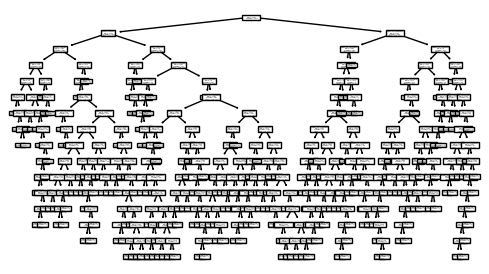

In [4]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

### Calculate the predictions

In [7]:
explanatory

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400
...,...,...,...,...,...
2023-03-15,259.980011,266.480011,259.209991,265.440002,46028000
2023-03-16,265.209991,276.559998,263.279999,276.200012,54768800


In [6]:
y_pred = model_dt.predict(X=explanatory)
y_pred

array(['UP', 'UP', 'UP', ..., 'UP', 'UP', 'UP'], dtype=object)

In [7]:
df_predictions = df[['diff_daily_1_direction']].copy()
df_predictions['prediction'] = y_pred
df_predictions

,diff_daily_1_direction,prediction
Date,,
2016-12-09,UP,UP
2016-12-12,UP,UP
...,...,...
2023-03-15,UP,UP
2023-03-16,UP,UP


### Evaluate the model: compare predictions with the reality

In [8]:
comp = df_predictions.diff_daily_1_direction == df_predictions.prediction

In [9]:
comp.sum()

1287

In [10]:
len(comp)

1576

In [11]:
comp.sum()/len(comp)

0.8166243654822335

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [12]:
import pickle

In [14]:
with open('models/model_dt_microsoft_linkedin_classification.pkl', 'wb') as f:
    pickle.dump(model_dt, f)